In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import os

In [2]:
LARGE_DATASET = True

In [3]:
if LARGE_DATASET:
    movie_path = "ml-latest/movies.csv"
    tags_path = "ml-latest/tags.csv"
    ratings_path_learn = "ml-latest/split/ratings_learning.csv"
    ratings_path_test = "ml-latest/split/ratings_testing.csv"
    movie_profiles_path = "/media/karol/E8B625B3B6258364/calculated/movie_profiles"
    user_profiles_path = "/media/karol/E8B625B3B6258364/calculated/user_profiles/"
    movie_matrix_path = "/media/karol/E8B625B3B6258364/calculated/movie_matrix"
else:
    movie_path = "ml-latest-small/movies.csv"
    tags_path = "ml-latest-small/tags.csv"
    ratings_path = "ml-latest-small/split/ratings_learning.csv"
    movie_profiles_path = "/media/karol/E8B625B3B6258364/calculated-small/movie_profiles"
    user_profiles_path = "/media/karol/E8B625B3B6258364/calculated-small/user_profiles/"

In [15]:
def plot_percents(percents):
    plt.figure(figsize=(20,10))
    objects = np.arange(100)
    plt.bar(objects, percents, align='center', alpha=0.5)
    plt.ylabel('n-users')
    plt.title('Recommendation accuracy - less is better')

    plt.show()

# Ocena wygenerowanych rekomendacji

Ciężko wymyślić jednoznaczne kryterium na określenie trafności rekomendacji. Po kilku testach zdecydowaliśmy się na wybraniu pozytywnie ocenionych filmów z danych testowych i zobaczeniu jak wysoko na liście rekomendacji te filmy się pojawiają. Im wyżej tym lepiej

In [5]:
ratings_data_learn = pd.read_csv(ratings_path_learn)
ratings_data_test = pd.read_csv(ratings_path_test)

In [6]:
usrs = ratings_data_test['userId'].drop_duplicates()

In [7]:
grps = ratings_data_learn.groupby(['userId','rating']).count().loc[usrs]

In [8]:
def read_user_recommendations(userId):
    path = "calculated/content_based_recommendations/" + str(userId)
    return pd.read_csv(path, header=None)

def get_recommendations_to_rate(userId):
    return ratings_data_test[ratings_data_test['userId']==userId]['movieId']

# get_recommendation_percentile: funkcja wczytuje listę ocen z danych testowych po czym
# wyszukuje jak wysoko w liście rekomendacji pojawiają się ocenione filmy
def get_recommendation_percentile(userId):
    rec = read_user_recommendations(userId)
    to_rate = get_recommendations_to_rate(userId)
    percentiles = []
    for movieId in to_rate:
        place = rec[rec[0] == movieId].index[0]
        percentiles.append(place * 100 / rec.shape[0])
    return percentiles

In [23]:
percents = np.zeros(100)
for userId in os.listdir("calculated/content_based_recommendations/"):
    percents[int(np.mean(get_recommendation_percentile(int(userId))))] += 1

In [25]:
percents = np.zeros(100)
for userId in os.listdir("calculated/content_based_recommendations/"):
    for percent in get_recommendation_percentile(int(userId)):
        percents[int(percent)] += 1

Jak widać na wykresie zdecydowana większość pozytywnych ocen z danych testowych znalazła się w pierwszych 10 procentach rekomendowanych filmów

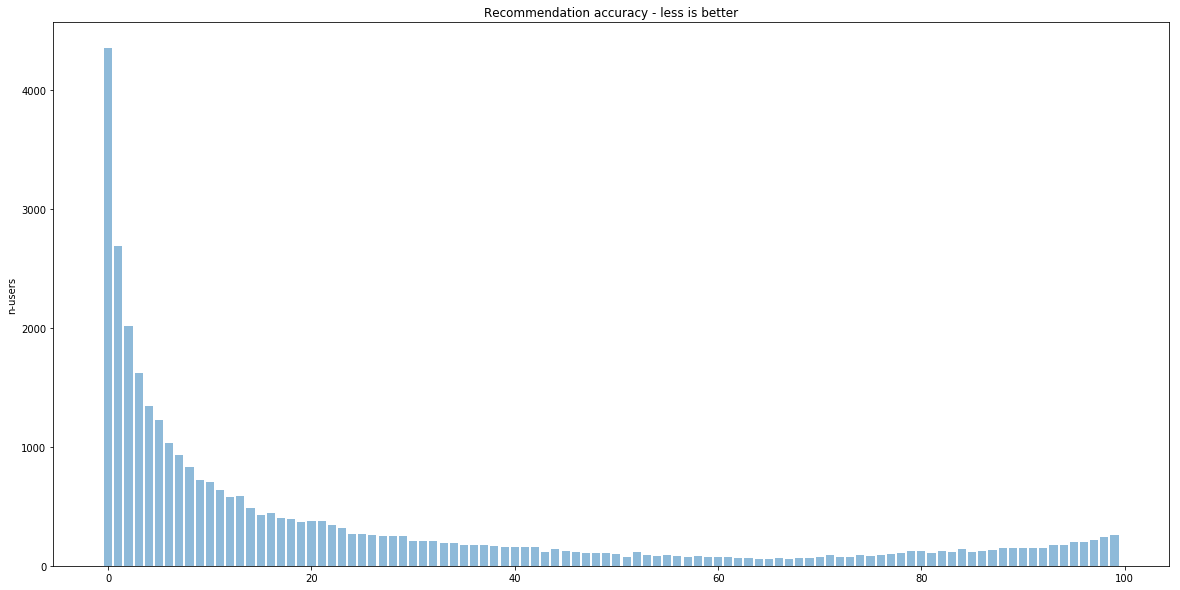

In [26]:
plot_percents(percents)